### Build a random forest classifier to predict the risk of heart disease based on a dataset of patient information. The dataset contains 303 instances with 14 features, including age, sex, chest pain type, resting blood pressure, serum cholesterol, and maximum heart rate achieved.

### Dataset link: https://drive.google.com/file/d/1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ/view?usp=share_link 

In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings(action="ignore")
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA

In [24]:
# Load the dataset
file_id = '1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ'
url = f'https://drive.google.com/uc?id={file_id}'
df = pd.read_csv(url)

In [25]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [26]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the numerical features if necessary. 

In [27]:
##Feature Engineering

#Find Missing values
df.isna().any()
#No missing values found

#If we find any missing value (say in age column) then below code can be used
# df["age"].fillna(df["age"].mean(), inplace=True)

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [41]:
#Encoding categorical variables

for i in df.columns:
    print(type(df[i][0]))

#All features are int type
#If we find categorical feature (say sex column) then below code can be used

#label_encoder=LabelEncoder()
#df["sex"] = label_encoder.fit_transform(df["sex"])

<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.float64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>


In [48]:
#Scaling the variables
scaler=StandardScaler()
variables_std=["age","trestbps","chol","thalach","oldpeak"]
for i in variables_std:
    df[i] = scaler.fit_transform(df[[i]])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1


### Q2. Split the dataset into a training set (70%) and a test set (30%)

In [116]:
# Split the dataset into a training set and a test set
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each tree. Use the default values for other hyperparameters. 

In [122]:
rf = RandomForestClassifier(n_estimators=100,max_depth=10, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

### Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.  

In [56]:
#Prediction on test set
y_pred=rf.predict(X_test)

#Performance
print("accuracy = ",accuracy_score(y_test,y_pred))
print("precision =", precision_score(y_test, y_pred))
print("recall =", recall_score(y_test, y_pred))
print("f1 =", f1_score(y_test, y_pred))


accuracy =  0.8131868131868132
precision = 0.8367346938775511
recall = 0.82
f1 = 0.8282828282828283


### Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart disease risk. Visualise the feature importances using a bar chart.

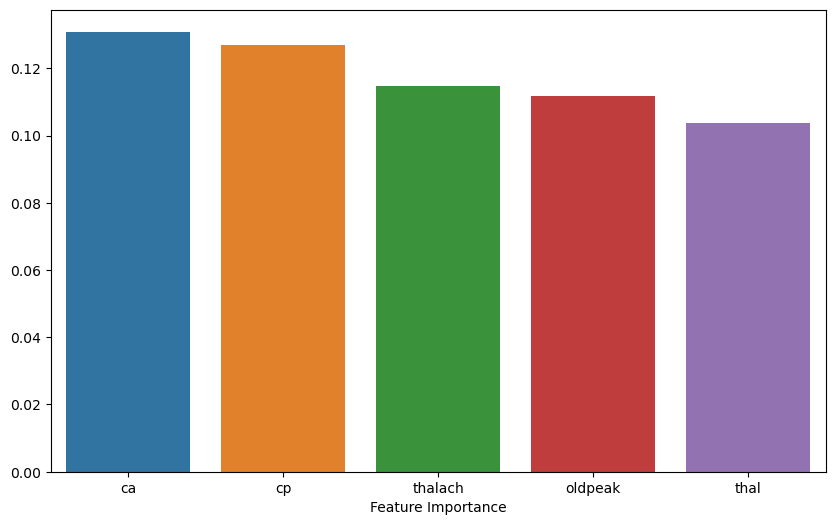

In [92]:
importances=rf.feature_importances_
indices=np.argsort(importances)[::-1]

top_feature = X_train.columns[indices][:5]
top_importances = importances[indices][:5]

# Visualize feature importances
plt.figure(figsize=(10,6))
sns.barplot(x=top_feature,y=top_importances)
plt.xlabel("Feature Importance")
plt.show()

### Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try different values of the number of trees, maximum depth, minimum samples split, and minimum samples leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.

In [95]:
params = {'n_estimators': [50, 100, 200, 300, 400], 'max_depth': [None, 5, 10, 15, 20], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=params, refit=True, cv=5, verbose=3)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 225 candidates, totalling 1125 fits
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.884 total time=   0.2s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.860 total time=   0.1s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.714 total time=   0.2s
[CV 4/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.905 total time=   0.2s
[CV 5/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.762 total time=   0.2s
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.860 total time=   0.4s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.860 total time=   0.4s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.762 

[CV 4/5] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=300;, score=0.857 total time=   1.2s
[CV 5/5] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=300;, score=0.738 total time=   1.3s
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=400;, score=0.884 total time=   1.8s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=400;, score=0.837 total time=   1.6s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=400;, score=0.690 total time=   1.7s
[CV 4/5] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=400;, score=0.881 total time=   1.8s
[CV 5/5] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=400;, score=0.762 total time=   1.7s
[CV 1/5] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.907 total time=   0.1s
[CV 2/5] END max_depth=None, min_s

[CV 3/5] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.714 total time=   0.8s
[CV 4/5] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.905 total time=   0.8s
[CV 5/5] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.762 total time=   0.9s
[CV 1/5] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=300;, score=0.884 total time=   1.4s
[CV 2/5] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=300;, score=0.837 total time=   1.2s
[CV 3/5] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=300;, score=0.738 total time=   1.1s
[CV 4/5] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=300;, score=0.905 total time=   1.2s
[CV 5/5] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=300;, score=0.738 total time=   1.2s
[CV 1/5] END max_depth=None, min

[CV 2/5] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.860 total time=   0.3s
[CV 3/5] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.714 total time=   0.4s
[CV 4/5] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.905 total time=   0.3s
[CV 5/5] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.762 total time=   0.4s
[CV 1/5] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.884 total time=   0.8s
[CV 2/5] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.837 total time=   0.8s
[CV 3/5] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.762 total time=   0.8s
[CV 4/5] END max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.905 total time=   0.8s
[CV 5/5] END max_depth=None, min

[CV 2/5] END max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.860 total time=   0.1s
[CV 3/5] END max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.738 total time=   0.1s
[CV 4/5] END max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.929 total time=   0.1s
[CV 5/5] END max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.762 total time=   0.1s
[CV 1/5] END max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.837 total time=   0.4s
[CV 2/5] END max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.860 total time=   0.4s
[CV 3/5] END max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.738 total time=   0.4s
[CV 4/5] END max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.881 total time=   0.4s
[CV 5/5] END max_depth=5, min_samples_leaf=1, min_samples_sp

[CV 2/5] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=400;, score=0.837 total time=   1.7s
[CV 3/5] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=400;, score=0.738 total time=   1.7s
[CV 4/5] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=400;, score=0.905 total time=   1.7s
[CV 5/5] END max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=400;, score=0.762 total time=   1.8s
[CV 1/5] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.884 total time=   0.2s
[CV 2/5] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.860 total time=   0.2s
[CV 3/5] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.738 total time=   0.1s
[CV 4/5] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.905 total time=   0.1s
[CV 5/5] END max_depth=5, min_samples_leaf=2, min_samples_split=

[CV 2/5] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=300;, score=0.860 total time=   1.2s
[CV 3/5] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=300;, score=0.762 total time=   1.2s
[CV 4/5] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=300;, score=0.905 total time=   1.2s
[CV 5/5] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=300;, score=0.762 total time=   1.5s
[CV 1/5] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=400;, score=0.884 total time=   1.7s
[CV 2/5] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=400;, score=0.860 total time=   1.7s
[CV 3/5] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=400;, score=0.762 total time=   1.6s
[CV 4/5] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=400;, score=0.905 total time=   1.6s
[CV 5/5] END max_depth=5, min_samples_leaf=4, min_samples_split=

[CV 2/5] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.837 total time=   0.3s
[CV 3/5] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.762 total time=   0.7s
[CV 4/5] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.857 total time=   0.7s
[CV 5/5] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.738 total time=   0.7s
[CV 1/5] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=300;, score=0.860 total time=   1.2s
[CV 2/5] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=300;, score=0.837 total time=   1.3s
[CV 3/5] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=300;, score=0.738 total time=   1.4s
[CV 4/5] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=300;, score=0.857 total time=   1.3s
[CV 5/5] END max_depth=10, min_samples_leaf=1, min_sampl

[CV 2/5] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.860 total time=   0.4s
[CV 3/5] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.786 total time=   0.4s
[CV 4/5] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.857 total time=   0.4s
[CV 5/5] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.762 total time=   0.4s
[CV 1/5] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.884 total time=   0.8s
[CV 2/5] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.837 total time=   0.8s
[CV 3/5] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.714 total time=   0.8s
[CV 4/5] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.857 total time=   0.8s
[CV 5/5] END max_depth=10, min_samples_leaf=2, min_sampl

[CV 2/5] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.860 total time=   0.1s
[CV 3/5] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.738 total time=   0.1s
[CV 4/5] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.929 total time=   0.1s
[CV 5/5] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.762 total time=   0.1s
[CV 1/5] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.860 total time=   0.4s
[CV 2/5] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.860 total time=   0.4s
[CV 3/5] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.690 total time=   0.3s
[CV 4/5] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.929 total time=   0.4s
[CV 5/5] END max_depth=10, min_samples_leaf=4, min_samples_s

[CV 2/5] END max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=400;, score=0.860 total time=   1.7s
[CV 3/5] END max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=400;, score=0.714 total time=   1.8s
[CV 4/5] END max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=400;, score=0.881 total time=   1.7s
[CV 5/5] END max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=400;, score=0.762 total time=   1.6s
[CV 1/5] END max_depth=15, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.837 total time=   0.1s
[CV 2/5] END max_depth=15, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.837 total time=   0.2s
[CV 3/5] END max_depth=15, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.738 total time=   0.1s
[CV 4/5] END max_depth=15, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.857 total time=   0.2s
[CV 5/5] END max_depth=15, min_samples_leaf=1, min_samples_s

[CV 2/5] END max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=300;, score=0.837 total time=   1.4s
[CV 3/5] END max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=300;, score=0.690 total time=   1.3s
[CV 4/5] END max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=300;, score=0.881 total time=   1.2s
[CV 5/5] END max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=300;, score=0.738 total time=   1.2s
[CV 1/5] END max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=400;, score=0.884 total time=   1.9s
[CV 2/5] END max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=400;, score=0.837 total time=   1.8s
[CV 3/5] END max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=400;, score=0.738 total time=   1.8s
[CV 4/5] END max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=400;, score=0.905 total time=   2.1s
[CV 5/5] END max_depth=15, min_samples_leaf=2, min_sampl

[CV 2/5] END max_depth=15, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=0.837 total time=   0.8s
[CV 3/5] END max_depth=15, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=0.762 total time=   0.7s
[CV 4/5] END max_depth=15, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=0.905 total time=   0.8s
[CV 5/5] END max_depth=15, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=0.762 total time=   0.8s
[CV 1/5] END max_depth=15, min_samples_leaf=4, min_samples_split=2, n_estimators=300;, score=0.884 total time=   1.3s
[CV 2/5] END max_depth=15, min_samples_leaf=4, min_samples_split=2, n_estimators=300;, score=0.860 total time=   1.3s
[CV 3/5] END max_depth=15, min_samples_leaf=4, min_samples_split=2, n_estimators=300;, score=0.762 total time=   1.3s
[CV 4/5] END max_depth=15, min_samples_leaf=4, min_samples_split=2, n_estimators=300;, score=0.905 total time=   1.2s
[CV 5/5] END max_depth=15, min_samples_leaf=4, min_sampl

[CV 2/5] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.860 total time=   0.4s
[CV 3/5] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.762 total time=   0.4s
[CV 4/5] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.905 total time=   0.4s
[CV 5/5] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.762 total time=   0.4s
[CV 1/5] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.860 total time=   0.8s
[CV 2/5] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.837 total time=   0.9s
[CV 3/5] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.762 total time=   0.9s
[CV 4/5] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.881 total time=   0.9s
[CV 5/5] END max_depth=20, min_samples_leaf=1, min_sampl

[CV 2/5] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.860 total time=   0.2s
[CV 3/5] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.714 total time=   0.1s
[CV 4/5] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.881 total time=   0.2s
[CV 5/5] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.738 total time=   0.2s
[CV 1/5] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.860 total time=   0.5s
[CV 2/5] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.860 total time=   0.4s
[CV 3/5] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.762 total time=   0.4s
[CV 4/5] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.905 total time=   0.4s
[CV 5/5] END max_depth=20, min_samples_leaf=2, min_samples_s

[CV 2/5] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=400;, score=0.837 total time=   1.7s
[CV 3/5] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=400;, score=0.714 total time=   1.7s
[CV 4/5] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=400;, score=0.905 total time=   1.6s
[CV 5/5] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=400;, score=0.738 total time=   1.7s
[CV 1/5] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.860 total time=   0.1s
[CV 2/5] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.860 total time=   0.1s
[CV 3/5] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.738 total time=   0.1s
[CV 4/5] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.929 total time=   0.1s
[CV 5/5] END max_depth=20, min_samples_leaf=4, min_sampl

[CV 2/5] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=300;, score=0.837 total time=   1.3s
[CV 3/5] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=300;, score=0.762 total time=   1.1s
[CV 4/5] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=300;, score=0.905 total time=   1.2s
[CV 5/5] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=300;, score=0.738 total time=   1.2s
[CV 1/5] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=400;, score=0.884 total time=   1.8s
[CV 2/5] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=400;, score=0.837 total time=   1.7s
[CV 3/5] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=400;, score=0.762 total time=   1.7s
[CV 4/5] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=400;, score=0.905 total time=   1.6s
[CV 5/5] END max_depth=20, min_samples_leaf=4, m

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200, 300, 400]},
             verbose=3)

### Q7. Report the best set of hyperparameters found by the search and the corresponding performance metrics. Compare the performance of the tuned model with the default model.

In [102]:
print("best_params =", grid_search.best_params_)

# Create random forest classifier with best hyperparameters
best_rf = RandomForestClassifier(**grid_search.best_params_, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(best_rf, X_train, y_train, cv=5)
print("Cross-validation Scores: ", cv_scores)
print("Mean Cross-validation Score: ", np.mean(cv_scores))

# Fit the tuned model on training data
best_rf.fit(X_train, y_train)

# Make predictions on testing data
y_pred2 = best_rf.predict(X_test)

#Performance
print("accuracy_base = ",accuracy_score(y_test,y_pred), "accuracy_best_rf = ",accuracy_score(y_test,y_pred2))
print("precision_base =", precision_score(y_test, y_pred),"precision_best_rf =", precision_score(y_test, y_pred2))
print("recall_base =", recall_score(y_test, y_pred), "recall_best_rf =", recall_score(y_test, y_pred2))
print("f1_base =", f1_score(y_test, y_pred), "f1_best_rf =", f1_score(y_test, y_pred2))

best_params = {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Cross-validation Scores:  [0.86046512 0.86046512 0.76190476 0.9047619  0.80952381]
Mean Cross-validation Score:  0.839424141749723
accuracy_base =  0.8131868131868132 accuracy_best_rf =  0.8351648351648352
precision_base = 0.8367346938775511 precision_best_rf = 0.8301886792452831
recall_base = 0.82 recall_best_rf = 0.88
f1_base = 0.8282828282828283 f1_best_rf = 0.8543689320388349


### Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the decision boundaries on a scatter plot of two of the most important features. Discuss the insights and limitations of the model for predicting heart disease risk. 

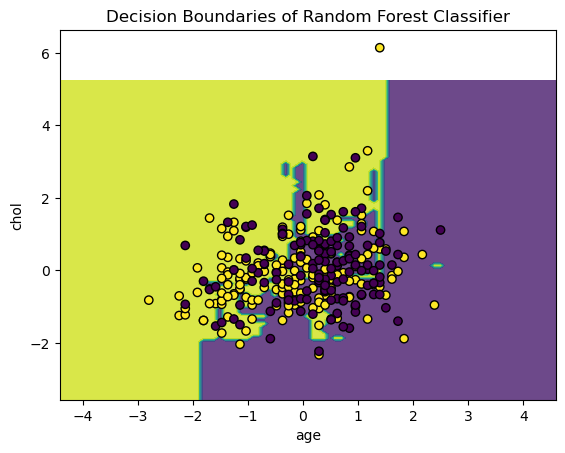

In [136]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train_pca, y_train)

# Extract two most important features
feature1 = 'age'
feature2 = 'chol'

# Plot the decision boundaries
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = rfc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[feature1], X[feature2], c=y, edgecolors='k', cmap='viridis')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title("Decision Boundaries of Random Forest Classifier")
plt.show()


Finally, let's discuss the insights and limitations of the model for predicting heart disease risk.

Insights:

 * The random forest classifier has been trained on patient information to predict the risk of heart disease.
 * The decision boundaries of the classifier, as shown in the scatter plot, can help us understand how the model is making predictions.
 * The decision boundaries separate the data into different regions, each corresponding to a different predicted class.
 * The scatter plot also shows the actual data points, where different colors represent different class labels predicted by the model.
 * The model's prediction improved by heper parameter tuning.

Limitation:

There is a risk of overfitting if the model is overly complex or if the dataset used for training is small or unrepresentative. 